# 2.1 Introduction

The Austin Animal Center has a constant stream of animals coming in and out of their doors. To help with the logistics of animal movement within the center, the purpose of this notebook is to analyze the features of the dog data to spot trends or the lack of trends in determining the estimated time each dog spends in the shelter before their eventual 'outcome'.

# 2.2 Imports

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from IPython import display
from ipywidgets import interact, widgets
from IPython.display import Image
from IPython.core.display import HTML 

# 2.3 Load in Data

We begin with reading in the cleaned dog data DataFrame that was created from the previous notebook.

In [2]:
dog_df = pd.read_csv('../clean_data/austin_dogs_clean.csv', index_col=0)

In [3]:
dog_df.shape

(55445, 15)

In [4]:
dog_df.head()

,id,name,breed_category,sex_intake,sex_outcome,intake_type,condition_intake,dt_intake,outcome,dt_outcome,delta_time,delta_time_d,age_in_years,month_outcome,year_outcome
0,A786884,*Brock,Beagle,Neutered Male,Neutered Male,Stray,Normal,2019-01-03 16:19:00,Transfer,2019-01-08 15:11:00,4 days 22:52:00,4.952778,2.0,1,2019
1,A706918,Belle,Spaniel,Spayed Female,Spayed Female,Stray,Normal,2015-07-05 12:59:00,Return to Owner,2015-07-05 15:13:00,0 days 02:14:00,0.093056,8.0,7,2015
2,A724273,Runster,Basenji,Intact Male,Neutered Male,Stray,Normal,2016-04-14 18:43:00,Return to Owner,2016-04-21 17:17:00,6 days 22:34:00,6.940278,1.0,4,2016
3,A682524,Rio,Doberman,Neutered Male,Neutered Male,Stray,Normal,2014-06-29 10:38:00,Return to Owner,2014-07-02 14:16:00,3 days 03:38:00,3.151389,4.0,7,2014
4,A743852,Odin,Labrador Retriever,Neutered Male,Neutered Male,Owner Surrender,Normal,2017-02-18 12:46:00,Return to Owner,2017-02-21 17:44:00,3 days 04:58:00,3.206944,2.0,2,2017


# 2.4 Explore the Data

#### 2.4.1 Initial Exploration of Time Spent in the Animal Center, the Target Variable

We begin by exploring 'delta_time_d', which is the time spent in the animal center from intake to outcome measured in days. This is our target value that will ultimately be modeled and predicted.

C:\Users\Tony\AppData\Local\Temp/ipykernel_19484/1444068271.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dog_plot_df['delta_time_bins'] = pd.cut(dog_df['delta_time_d'], bins=bins, labels=labels)


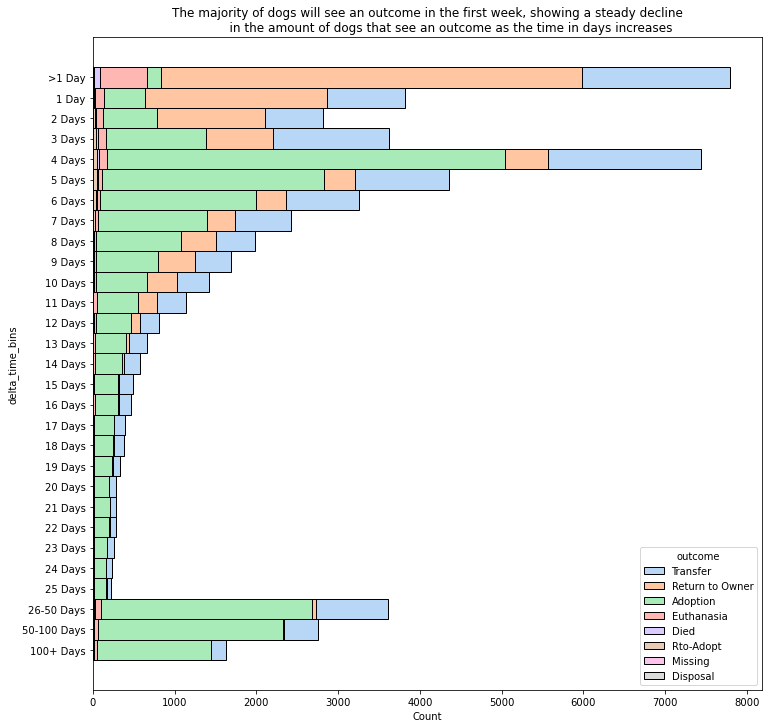

In [5]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 50, 100, 10000]
labels = ['>1 Day', '1 Day', '2 Days', '3 Days', '4 Days', '5 Days', '6 Days', '7 Days', '8 Days',
          '9 Days', '10 Days', '11 Days', '12 Days', '13 Days', '14 Days', '15 Days', '16 Days', '17 Days',
          '18 Days', '19 Days', '20 Days', '21 Days', '22 Days', '23 Days', '24 Days', '25 Days', '26-50 Days', 
          '50-100 Days', '100+ Days']
dog_plot_df = dog_df[['delta_time_d', 'outcome']]
dog_plot_df['delta_time_bins'] = pd.cut(dog_df['delta_time_d'], bins=bins, labels=labels)

f = plt.figure(figsize=(12,12))
ax = f.add_subplot(1,1,1)
sns.histplot(data=dog_plot_df, ax=ax, stat="count", multiple="stack",
             y="delta_time_bins", kde=False,
             palette="pastel", hue="outcome",
             element="bars", legend=True)
plt.title('The majority of dogs will see an outcome in the first week, showing a steady decline\n\
            in the amount of dogs that see an outcome as the time in days increases')
plt.show()

In [6]:
dog_df['delta_time_d'].describe()

count    55445.000000
mean        17.135873
std         46.483790
min          0.000694
25%          2.856250
50%          5.215972
75%         11.898611
max       1912.938194
Name: delta_time_d, dtype: float64

Upon plotting the histogram plot of the data and viewing the descriptive statistics of the feature, we can see that the average time spent in the Austin Animal Center for dogs is around 17 days. 

The histogram shows that most dogs spend under one week until their relative outcome, with the number decreasing day by day. The majority of dogs within the first day are Returned to Owner, showing a quick turn around to return lost dogs to their owners. The number of dogs Adopted shows a peak at 4 days before a gradual decline over time.

The **minimum** time spent is 0.000694 days, which is about 60 minutes. The **maximum** time between intake and outcome is about 1912 days, which is more than 5 years long!

In [7]:
dog_df['delta_time_d'].sort_values(ascending=False).head()

22279    1912.938194
8526     1521.979861
17988    1351.847222
17888    1195.004167
24549    1167.829861
Name: delta_time_d, dtype: float64

In [8]:
dog_df.iloc[22279]

id                              A642712
name                            Patches
breed_category                 Pit Bull
sex_intake                Spayed Female
sex_outcome               Spayed Female
intake_type                       Stray
condition_intake                Injured
dt_intake           2016-01-05 11:37:00
outcome                        Adoption
dt_outcome          2021-04-01 10:08:00
delta_time           1912 days 22:31:00
delta_time_d                1912.938194
age_in_years                       11.0
month_outcome                         4
year_outcome                       2021
Name: 22279, dtype: object

The longest time spent in the Austin Animal Center was by a female Pitbull named **Patches**. Patches was taken in as an injured stray in 2016 and was adopted in 2021 at 11 years old.

![Image of Patches with Her Adopted Owner](https://img.texasmonthly.com/2021/04/best-things-in-texas-dog-adoptions.jpeg?auto=compress&crop=faces&fit=fit&fm=webp&h=0&ixlib=php-1.2.1&q=45&w=1850)

Here is an image of Patches with her adopted owner! To read more about Patches' journey, you can go to the following link:

<br>https://www.texasmonthly.com/being-texan/austin-dog-patches-adopted-after-waiting-1913-days/
<br>https://www.facebook.com/Playful-Patches-Found-Her-Forever-Home-424892594567968/


#### 2.4.2 Exploring Intake Condition

When animals are entered into the shelter, their condition upon intake is noted. This can vary from normal, injured, sick, nursing, pregnant, etc.

In [9]:
dog_df['condition_intake'].value_counts()

Normal        49186
Injured        2878
Sick           1663
Nursing        1024
Aged            333
Other           113
Medical         102
Pregnant         56
Neonatal         51
Behavior         26
Feral             9
Med Attn          3
Med Urgent        1
Name: condition_intake, dtype: int64

From the dog adoption data, we see that the top three amounts of the intake conditions for dogs at the Austin Animal Center:
1. Normal
2. Injured
3. Sick

In [10]:
dog_df.groupby('condition_intake')['delta_time_d'].describe().T

condition_intake,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Normal,Nursing,Other,Pregnant,Sick
count,333.000000,26.000000,9.000000,2878.000000,3.000000,1.000000,102.000000,51.000000,49186.000000,1024.000000,113.000000,56.000000,1663.000000
mean,16.813190,44.556998,6.476003,25.501953,14.146759,3.867361,21.981951,28.184572,16.375851,30.250960,38.106453,26.320002,14.397393
std,57.223330,59.863090,2.350319,61.761454,11.303199,NaN,29.838722,30.395650,45.472987,33.042629,82.169311,40.556319,44.846015
min,0.011806,0.961111,3.065972,0.002083,6.325000,3.867361,0.002083,0.020139,0.000694,0.002083,0.003472,0.000694,0.001389
25%,0.315972,6.200868,5.018056,1.838194,7.667014,3.867361,3.728472,0.172917,3.023611,2.799826,3.130556,2.226910,0.175694
50%,1.983333,20.427083,5.839583,6.368750,9.009028,3.867361,8.170139,6.693750,5.217361,17.525347,7.091667,5.597222,2.408333
75%,6.309028,55.414410,8.031250,24.123611,18.057639,3.867361,37.213889,63.831597,11.092882,56.346528,33.063889,28.509201,9.001389
max,488.953472,210.991667,10.040278,1912.938194,27.106250,3.867361,216.032639,86.905556,1521.979861,282.990278,488.888889,166.067361,790.581250


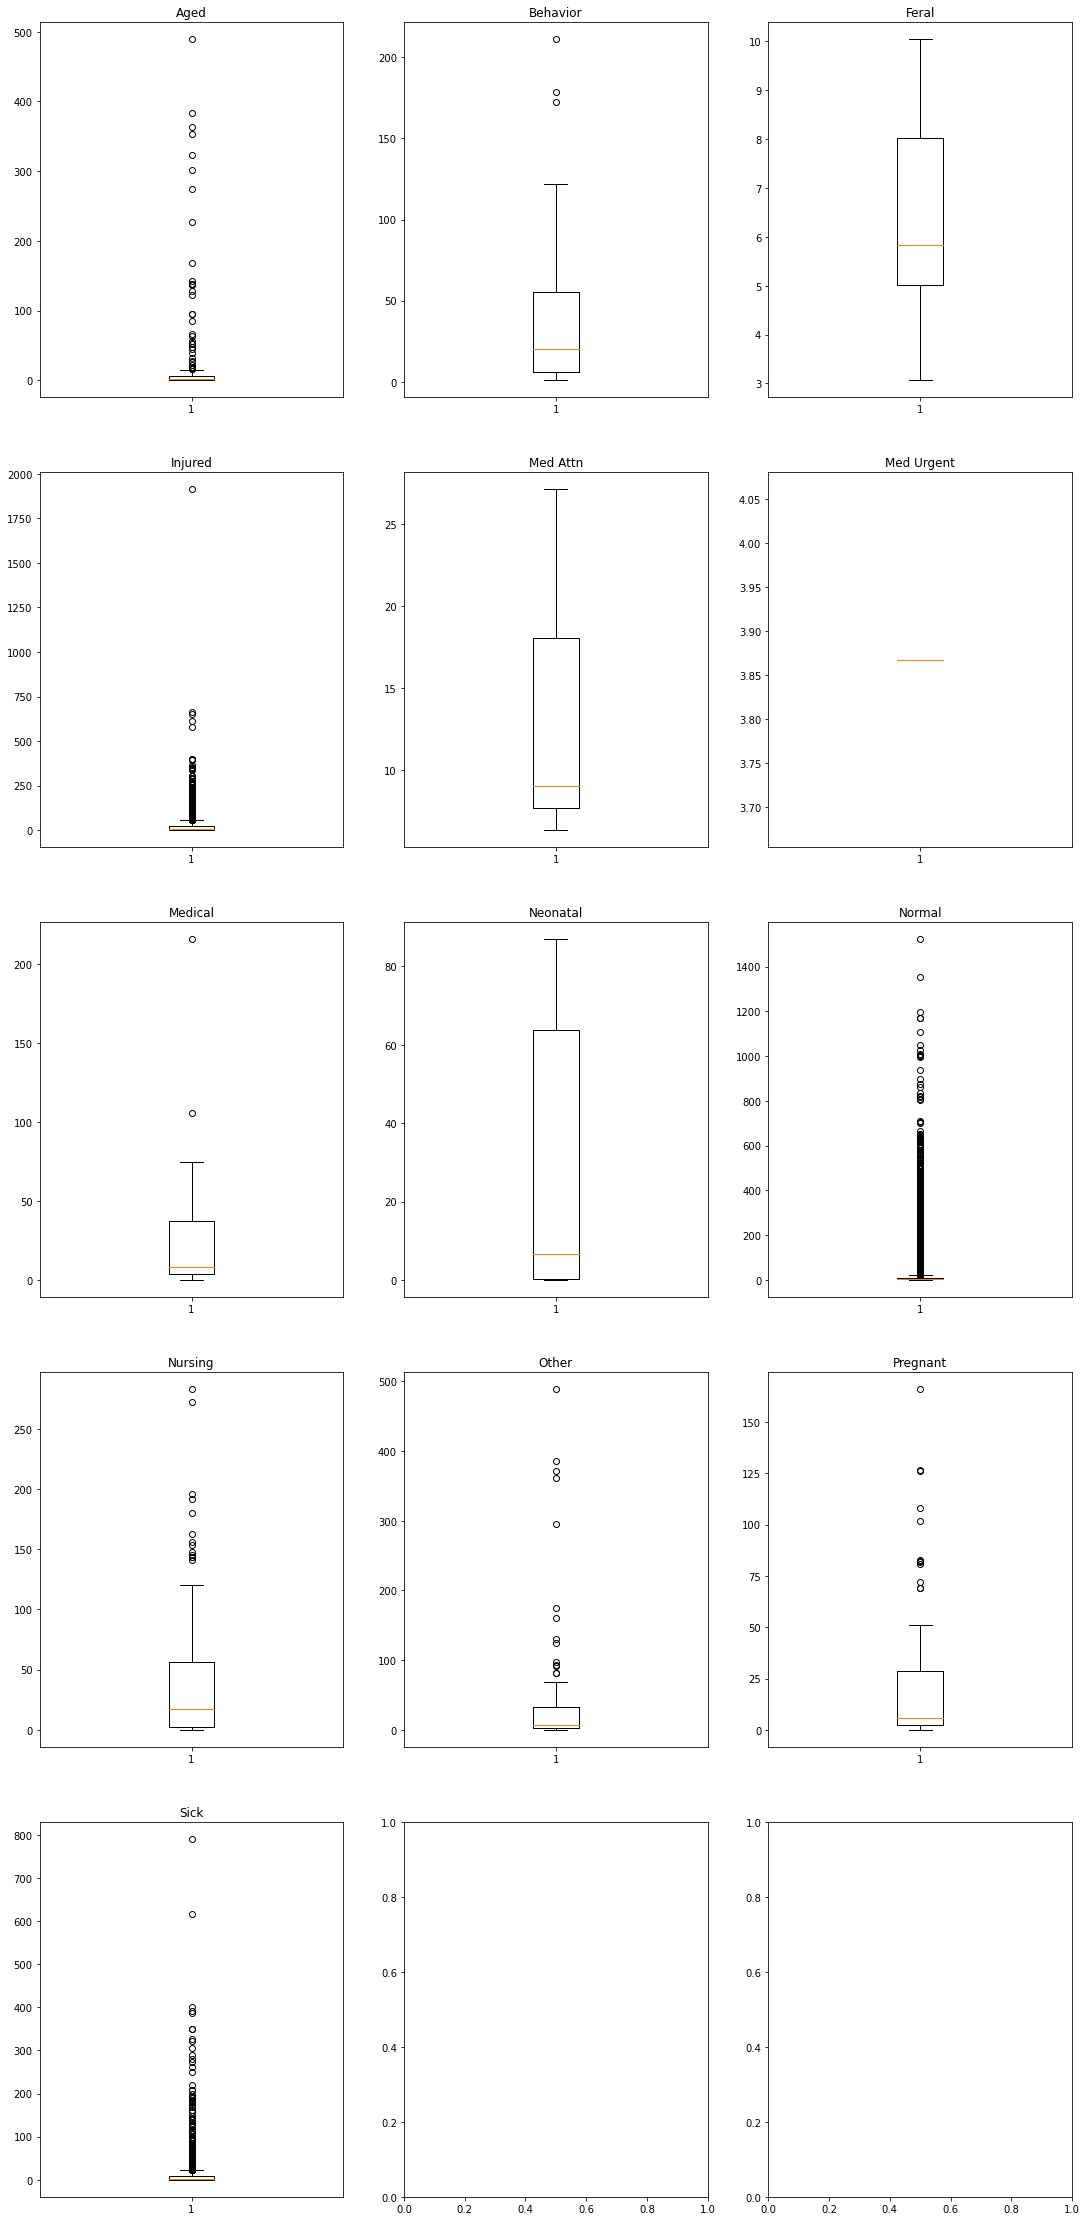

In [11]:
x=0
y=0
fig, ax = plt.subplots(5,3)
for i, group in dog_df.groupby('condition_intake'):
    ax[x][y].boxplot(x='delta_time_d', data=group)
    ax[x][y].set_title(''+i)
    y+=1
    if y==3:
        x+=1
        y=0
fig.set_size_inches(18.5, 40)
plt.show()

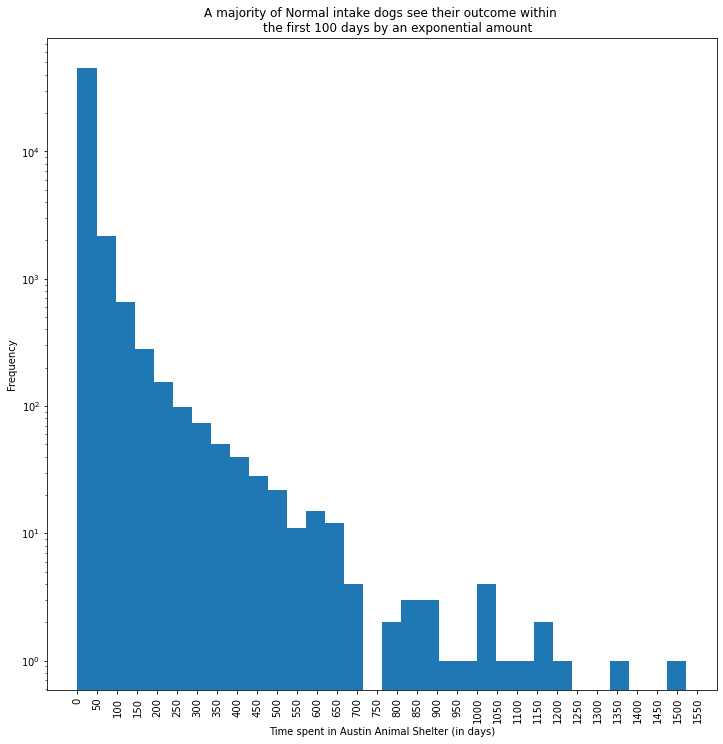

In [129]:
dog_plot = dog_df[dog_df['condition_intake']=='Normal']
plt.figure(figsize=(12,12))
dog_plot['delta_time_d'].plot(kind='hist', bins=32, logy=True)
plt.xticks(np.arange(0, 1600, step=50), rotation=90)
plt.title('A majority of Normal intake dogs see their outcome within \n\
        the first 100 days by an exponential amount')
plt.xlabel('Time spent in Austin Animal Shelter (in days)')
plt.show()

As we can see from the box plot and the descriptive statistics, most plots have extremely large outliers. For example, the normal intake condition, which accounts for an extremely large portion of our population has an IQR of 8.07, a median of 5.2 days, however it also has a maximum value of 1521 days. 

I have pulled out the Normal condition column to take a closer look. The amount of normal intake dogs with an outcome of under 50 days are exponentially decreases as the amount of days increases.

#### 2.4.3 Exploring Outcome Correlations

Some of the many outcomes for dogs are as follows: Adoption, Return to Owner, Euthanasia, Died, Transfer, and etc.

We are going to explore some of these options and see if different outcomes can effect the time spent in the shelter. For example, if we have a dog that is known to be lost and found, how long does the shelter typically take to find and return to its owner? How long do adoptions typically take when taking into account other features, like condition, age, and breed?

In [12]:
dog_df['outcome'].value_counts()

Adoption           25963
Transfer           14363
Return to Owner    12936
Euthanasia          1538
Rto-Adopt            356
Died                 238
Disposal              33
Missing               18
Name: outcome, dtype: int64

The top 3 most common outcomes for dogs taken in at the Austin Animal Center are:
1. Adoption
2. Transfer
3. Return to Owner

The 'Transfer' outcome is the animal outcome where Austin Animal Center will send pets to different shelters that would be able to more confidently handle the transferred animal to provide a more suitable and timely outcome. This could mean a transfer to a different animal center that has had a season of lower animal intakes or to a specialized rescue that primarily cares for and rehomes specific breeds. It is a viable option to increase the number of adoptions versus other methods such as Euthanasia and also reduce the total time each animal spends in a shelter, thus accomodating shelters with limited space and resources for rescues.

In [13]:
dog_df.groupby('outcome')['delta_time_d'].describe().T

outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
count,25963.000000,238.000000,33.000000,1538.000000,18.000000,12936.000000,356.000000,14363.000000
mean,27.063825,16.137745,4.876852,13.795712,38.253356,3.275378,14.932145,12.103749
std,61.207829,48.561186,4.398418,50.865800,48.315238,6.042685,36.051451,28.403399
min,0.020833,0.002083,0.009722,0.002083,0.725694,0.000694,0.120833,0.000694
25%,4.338889,0.877257,0.689583,0.177951,5.399479,0.397743,4.192535,3.067361
50%,7.285417,3.596181,4.064583,2.991319,16.674306,1.252083,6.127778,5.156250
75%,24.152431,8.330208,6.220139,10.033854,59.968924,4.145139,11.119271,10.973264
max,1912.938194,389.845139,14.906250,802.729861,167.252083,216.157639,476.015278,1351.847222


From the table, we can see that the 'Return to Owner' outcome value has a mean of 3.27 days and a median of 1.25 days, which is the shortest average and median lengths of time amongst all the categories. Over 50% of dogs that are lost are found and returned to their owners within a day or two!

We explore the correlation between intake condition and outcome by plotting each histogram. From this, we can see that a Normal Intake mainly resulted in an Adoption, Return to Owner or Transfer outcome.

In [14]:
def plot_outcome(outcome):
    '''
    Plots the frequency of each intake condition per outcome using the ipywidget slider
    '''
    outcome_list = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 
                  'Died', 'Missing', 'Disposal', 'Rto-Adopt']
    col_order = ['Normal', 'Injured', 'Sick', 'Feral', 'Aged', 'Behavior', 'Med Attn', 
                 'Medical', 'Med Urgent', 'Neonatal', 'Nursing', 'Pregnant', 'Other']
    data = dog_df[dog_df['outcome'] == outcome]
    sns.catplot(x='condition_intake', data=data, kind='count', order=col_order, height=7)
    plt.xticks(rotation=90)
    plt.ylim(0,25000)
    plt.title(f'Frequency of intake conditions per outcome type (Current Outcome : {outcome})')
    plt.show()

In [15]:
outcome_list = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 
                  'Died', 'Missing', 'Disposal', 'Rto-Adopt']
interact(plot_outcome,outcome=widgets.Select(
    options=outcome_list,
    description='Outcome:',
    rows=8,
    disabled=False
    ))

interactive(children=(Select(description='Outcome:', options=('Adoption', 'Return to Owner', 'Transfer', 'Euth…

<function __main__.plot_outcome(outcome)>

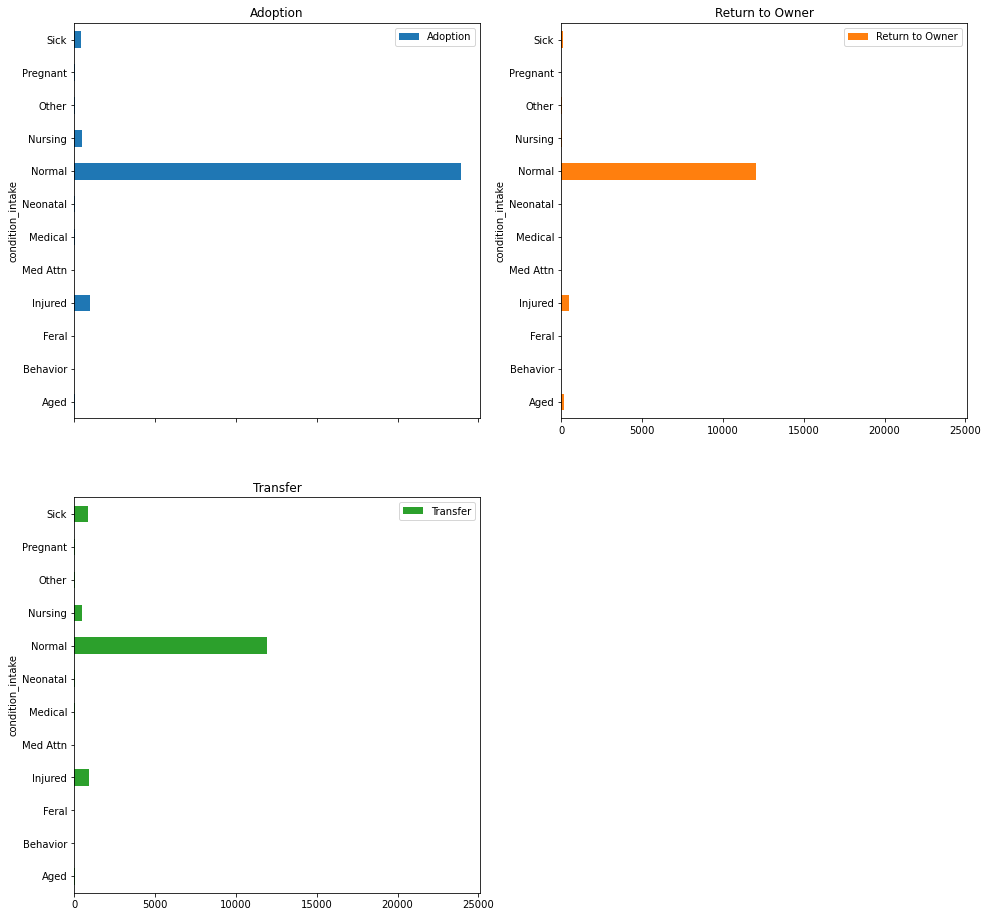

In [92]:
dog_plot = dog_df[dog_df['outcome'].isin(['Adoption', 'Return to Owner', 'Transfer'])]
dog_plot.groupby('condition_intake')['outcome'].value_counts().unstack()\
                    .plot(kind='barh', figsize=(16,16), subplots=True, layout=(2,2), 
                          sharex=True)
plt.show()

I have pulled out the Adoption, Return to Owner, and Transfer frequency charts. The majority of the dogs that are have a normal intake condition are adopted at a total of almost 25,000 dogs. 

Dogs that are transferred to different shelters  total 14,300 with the majority being normal. 

Dogs that are Returned to Owner total 12,5000 dogs with a majority being normal as well.

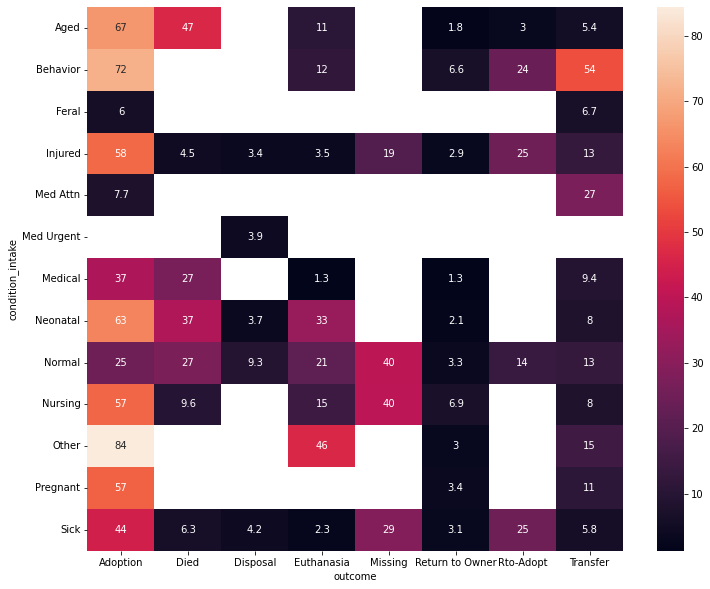

In [29]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='condition_intake',
                                     columns='outcome')

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

The intake conditions Sick, Pregnant, Other, Nursing, Neonatal, Medical, Injured, Behavior, and Aged, all have higher correlation values compared to the Normal condition for Adoption Outcomes. This means, that with a more positive correlation, the higher the 'delta_time_d' value, or the time spent in the animal center.


#### 2.4.4 Year and Month

Does time of year affect how long dogs are in the shelter? Did the shelter have more adoptions, transfers, etc. one year versus another? We explore the year and month to see if they have an affect on the time spent in the shelter.

In [19]:
dog_df[dog_df['year_outcome']>2013]['year_outcome'].value_counts().sort_index()

2014    8071
2015    7339
2016    6816
2017    6824
2018    6598
2019    7838
2020    4140
2021    4550
2022    1381
Name: year_outcome, dtype: int64

In [20]:
dog_df.groupby('year_outcome')['delta_time_d'].describe()

,count,mean,std,min,25%,50%,75%,max
year_outcome,,,,,,,,
2013,1888.0,8.525917,11.280456,0.000694,1.958507,4.968403,9.986285,91.159722
2014,8071.0,14.674217,28.887179,0.003472,2.916667,5.179167,12.026042,417.873611
2015,7339.0,14.420017,34.517260,0.000694,2.315278,5.118750,10.913194,653.029861
2016,6816.0,17.366986,46.077852,0.002083,2.869444,5.109722,11.028125,997.879861
2017,6824.0,14.482271,41.900119,0.000694,2.175521,4.953125,9.892882,938.098611
2018,6598.0,17.230251,48.439563,0.002083,2.243229,5.114931,11.197222,1026.885417
2019,7838.0,17.867128,42.980665,0.001389,3.063889,5.594792,11.235069,705.026389
2020,4140.0,25.529347,71.701387,0.000694,3.139583,6.079167,15.995313,1521.979861
2021,4550.0,22.897283,69.272258,0.001389,3.667014,7.005208,16.931250,1912.938194


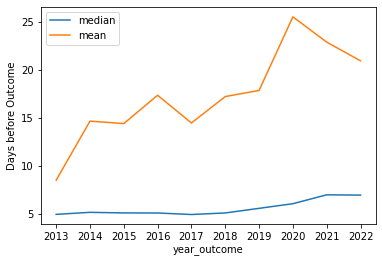

In [21]:
data = pd.DataFrame({'median':dog_df.groupby('year_outcome')['delta_time_d'].median(),
                    'mean':dog_df.groupby('year_outcome')['delta_time_d'].mean()})
data.plot()
plt.ylabel('Days before Outcome')
plt.xticks(ticks=data.index)
plt.show()

In [22]:
dog_df['month_outcome'].value_counts().sort_index()

1     5007
2     4586
3     4872
4     4016
5     4568
6     4376
7     4515
8     4455
9     4470
10    4873
11    4523
12    5184
Name: month_outcome, dtype: int64

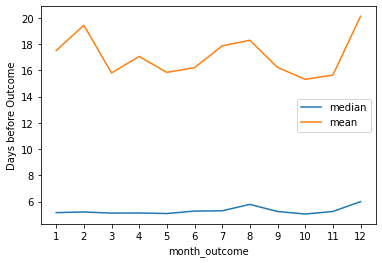

In [23]:
data = pd.DataFrame({'median':dog_df.groupby('month_outcome')['delta_time_d'].median(),
                    'mean':dog_df.groupby('month_outcome')['delta_time_d'].mean()})
data.plot()
plt.ylabel('Days before Outcome')
plt.xticks(ticks=data.index)
plt.show()

Both the median and and mean show a positive increase by year for the days spent in the animal center before outcome.

For month, we do not see a large increase in the median time in days between each month, however, we see increases in the mean around Dec - Feb and Jul - Aug.

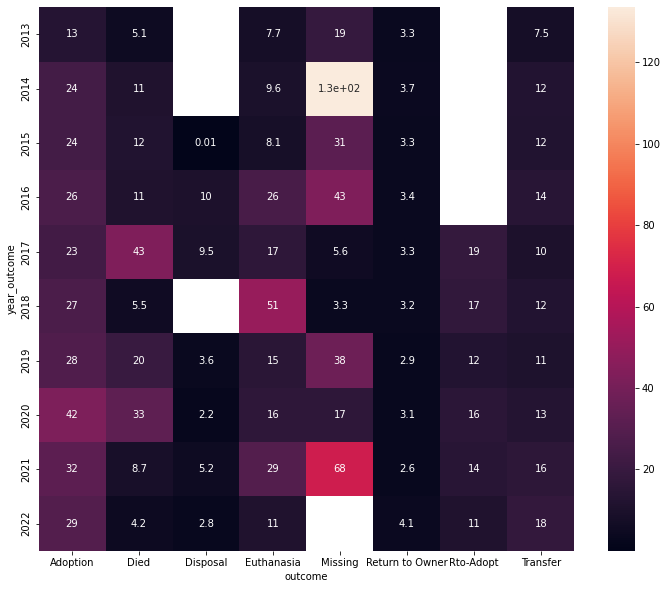

In [140]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='year_outcome',
                                     columns=['outcome'])

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

The heatmap does show that 2020 had a more positive correlation for adoption than the previous years, meaning that the average time spent in the shelter increased, most likely due to the COVID pandemic. Less people coming into the shelter to view dogs during the pandemic may have increased the average time dogs were adopted for that year. 

The return to owner outcome has a generally low correlation value showing that dogs throughout the years have always been quickly returned to their owner if lost and found.



#### 2.4.5 Intake Type

Animals entered in the shelter also have an intake type, including if the animal was a stray, if it was wildlife, an owner surrender, euthanasia request, etc.

Does this intake type have a correlation to the amount of time before their outcome?

In [24]:
dog_df.groupby('intake_type')['delta_time_d'].describe().T

intake_type,Abandoned,Euthanasia Request,Owner Surrender,Public Assist,Stray,Wildlife
count,264.000000,163.000000,9550.000000,4435.000000,41032.000000,1.000000
mean,18.493434,3.626197,21.622292,14.747137,16.395220,0.015972
std,32.263556,16.619211,57.636190,39.940451,44.270781,NaN
min,0.000694,0.007639,0.001389,0.000694,0.000694,0.015972
25%,3.939583,0.052083,2.025694,3.948958,3.129688,0.015972
50%,7.330208,0.118056,5.024306,8.087500,5.144444,0.015972
75%,17.295660,0.881944,16.882812,11.074306,11.104340,0.015972
max,252.927778,162.255556,1521.979861,1002.599306,1912.938194,0.015972


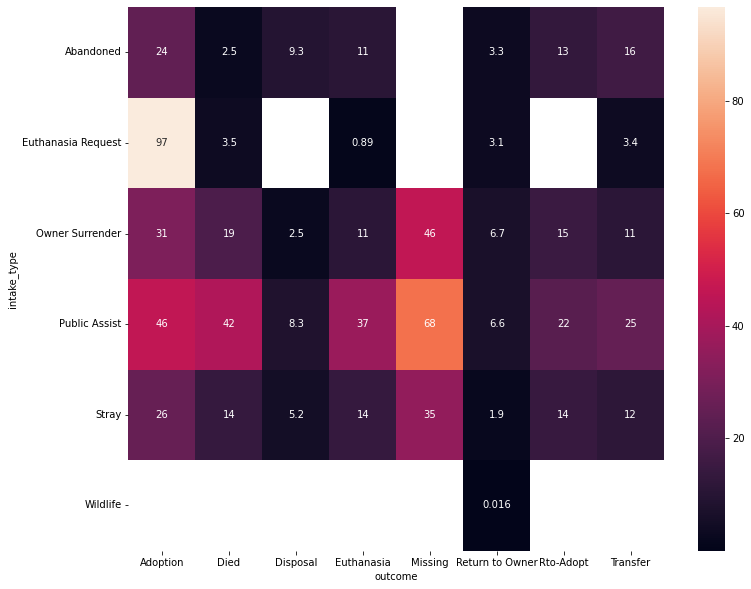

In [28]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='intake_type',
                                     columns=['outcome'])

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

We only have 1 value for wildlife. This generally is dedicated for other types of animals that are not domesticated pets.

The majority of the intake_type values are under Stray or Owner Surrender. Both show a median of around 5 days, with extremely large maximums greatly affecting the mean.

We check to see if there is any correlation between the time spent in the shelter (delta_time_d) and our other numerical columns (age in years, the month, and the year).

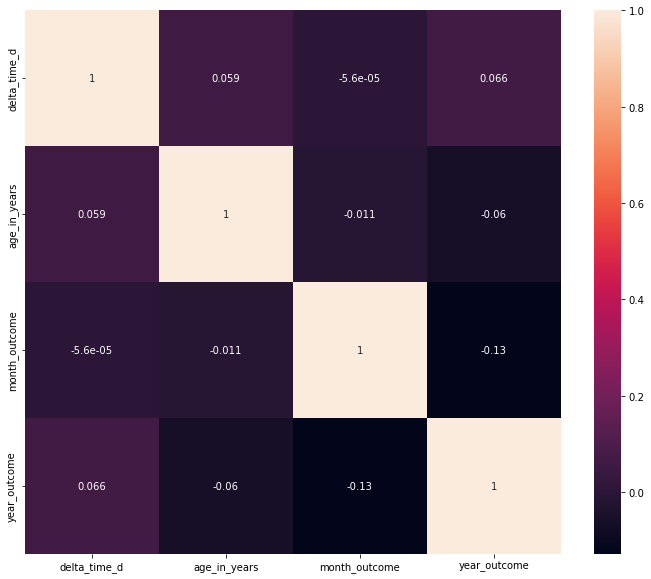

In [25]:
plt.subplots(figsize=(12,10))
sns.heatmap(dog_df.corr(), annot = True);

We do not see any significant correlations in these features.

We check next check the individual years to see if they have any correlation with outcome and the time they spend in the shelter.

#### 2.4.6 Sex of the Dog

Does the sex of the dog, or whether it is intact or neutered/spayed affect how long they stay in the shelter until their outcome?


In [139]:
dog_df.groupby('sex_outcome')['delta_time_d'].describe().T

sex_outcome,Intact Female,Intact Male,Neutered Male,Spayed Female
count,7021.000000,7553.000000,21517.000000,19354.000000
mean,7.015706,6.710348,20.864511,20.730405
std,22.850938,22.240101,49.491861,54.558992
min,0.000694,0.000694,0.000694,0.002083
25%,0.957639,0.884722,4.056944,4.034028
50%,3.255556,3.063194,6.231250,6.096181
75%,6.925000,6.785417,15.400694,14.504861
max,666.908333,625.959722,1167.829861,1912.938194


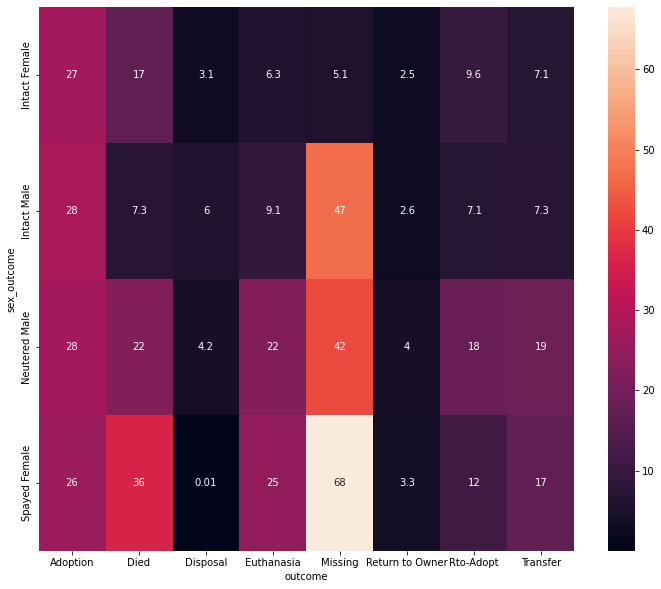

In [27]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='sex_outcome',
                                     columns=['outcome'])

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

From the chart, we see that intact females and intact males on average spend less time in the shelter than their fixed counterparts.

#### 2.4.7 Breed

Does the breed of a dog determine if they spend more time in the shelter?

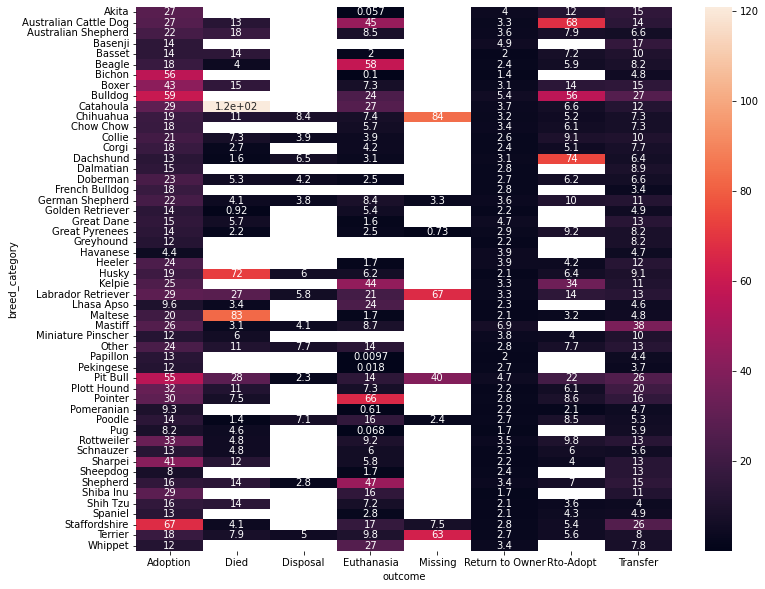

In [30]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='breed_category',
                                     columns='outcome')

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

From the correlation heat map above, we can see specific breeds have higher positive correlation values for adoption compared to others, such as Staffordshire, Pit Bulls, Bull Dogs, Boxer, Sharpei, and Bichons, with the first four being bully breeds. 

There is no significant change for Return to Owner correlations between breeds. The overall low correlation coincides with the low average time spent in the animal shelter across all animals that received this outcome.

#### 2.4.8 Dog Age

Does a dog's age have any correlation with how long they spend in the shelter?

We begin by categorizing the dog's ages into more managable bins so we can more easily view the data.

In [31]:
bins = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 100]
labels = ['0-1 yrs', '2-3 yrs', '4-5 yrs', '6-7 yrs', '8-9 yrs', '10-11 yrs',
         '12-13 yrs', '14-15 yrs', '16-17 yrs', '18-19 yrs', '20+ yrs']

dog_df['age_in_years_bins'] = pd.cut(dog_df['age_in_years'], bins=bins, labels=labels)

In [141]:
dog_df.groupby('age_in_years_bins')['delta_time_d'].describe()

,count,mean,std,min,25%,50%,75%,max
age_in_years_bins,,,,,,,,
0-1 yrs,28497.0,13.535610,26.392013,0.000694,3.870139,5.186111,11.004167,709.816667
2-3 yrs,14222.0,20.742229,50.077547,0.000694,3.090799,6.241667,14.951910,1002.599306
4-5 yrs,4623.0,20.635226,61.584351,0.001389,1.915972,5.172222,12.104167,1521.979861
6-7 yrs,2862.0,20.275362,63.304686,0.000694,1.138368,4.940625,10.969618,1351.847222
8-9 yrs,2081.0,21.637781,62.070793,0.002083,1.008333,4.177083,11.131944,997.879861
10-11 yrs,1606.0,27.078089,101.147180,0.004167,0.844271,3.821528,9.846354,1912.938194
12-13 yrs,900.0,23.176374,96.619852,0.008333,0.767014,2.735764,7.560069,1167.829861
14-15 yrs,468.0,10.924389,52.409397,0.004861,0.213715,1.123264,4.128472,863.715972
16-17 yrs,144.0,9.323346,43.582819,0.021528,0.186806,0.937500,2.261458,389.091667


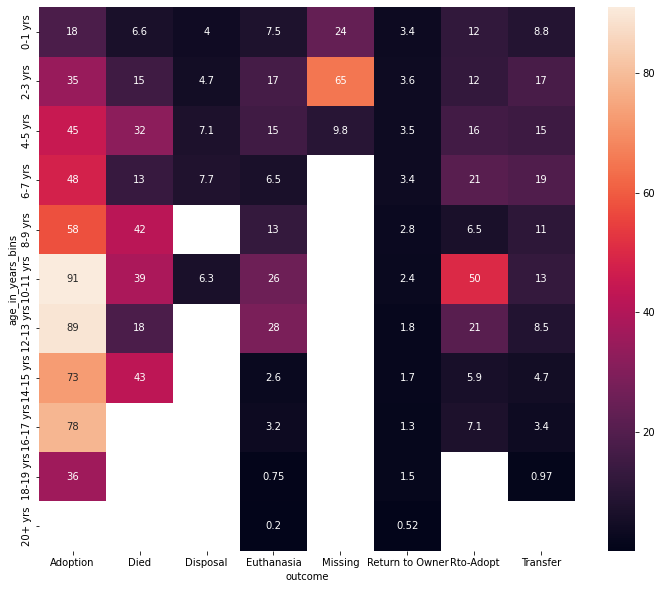

In [33]:
df_heatmap = dog_df.pivot_table(values='delta_time_d',index='age_in_years_bins',
                                     columns='outcome')

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.show()

There's a positive correlation in the adoption column from the years of 10-13 years. Showing that the dogs between those years have a generally higher time spent in the animal center vs dogs of younger or older ages. 

In [98]:
def plot_age(outcome):
    '''
    Scatter plot comparing age to time spent in the animal center before outcome, plots separated by
    outcome type using the ipywidget slider
    '''
    data = dog_df[dog_df['outcome'] == outcome]
    col_map = {'Normal':'grey', 'Injured':'red', 'Sick':'grey',
               'Nursing':'grey', 'Aged':'grey', 'Medical':'grey',
              'Other':'grey', 'Neonatal':'grey', 'Behavior':'grey', 'Med Urgent':'grey',
              'Pregnant':'grey', 'Med Attn':'grey', 'Feral':'grey'}
    plt.subplots(figsize=(10,10))
    sns.scatterplot(x='age_in_years', y='delta_time_d', data=data, hue='condition_intake', 
                    palette=col_map, alpha=0.4)
    plt.legend()
    plt.ylim(0,500)
    plt.xlim(0,20)
    plt.title(f'Time before outcome vs age per outcome type (Current Outcome : {outcome})')
    plt.show()

In [99]:
outcome_list = ['Adoption', 'Return to Owner', 'Transfer', 'Euthanasia', 
                  'Died', 'Missing', 'Disposal', 'Rto-Adopt']
interact(plot_age,outcome=widgets.Select(
    options=outcome_list,
    description='Outcome:',
    rows=8,
    disabled=False
    ))

interactive(children=(Select(description='Outcome:', options=('Adoption', 'Return to Owner', 'Transfer', 'Euth…

<function __main__.plot_age(outcome)>

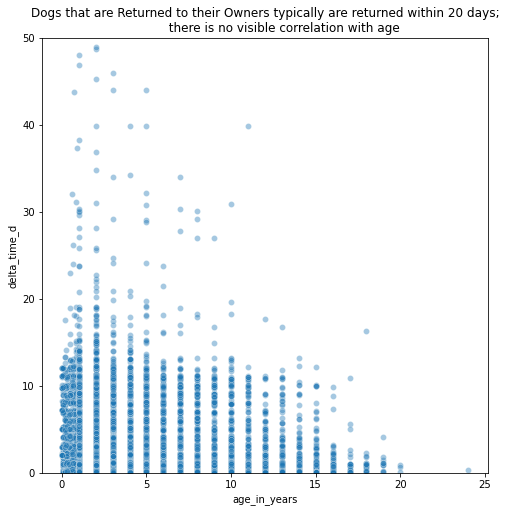

In [137]:
plt.figure(figsize=(8,8))
dog_plot = dog_df[dog_df['outcome']=='Return to Owner']
sns.scatterplot(x='age_in_years', y='delta_time_d', data=dog_plot, alpha=0.4)
plt.ylim(0,50)
plt.title('Dogs that are Returned to their Owners typically are returned within 20 days;\n\
          there is no visible correlation with age')
plt.show()

The scatter plot above shows that dogs that were returned to their owners, despite the age of the dog, were released from the animal center at a fairly quick rate.

The time spent in the animal center before adoption increased as the dog's age increases, however, it also decreased for senior dogs.

A majority of the Transferred dogs were under the age of 10, where the both the amount of dogs transferred and their time spent in the animal center before transfer decreased.


# 2.5 Summaries

From the correlation maps and our graphical exploratory data analysis, we can conclude that age, breed, intake condition, intake type and sex have some sort of correlation with the range of our target variable.

# 2.6 Save the CSV file

In [34]:
dog_data_clean = dog_df.drop(['id','age_in_years', 'sex_outcome', 'dt_intake', 
                              'dt_outcome', 'delta_time'], axis=1)
dog_data_clean

,name,breed_category,sex_intake,intake_type,condition_intake,outcome,delta_time_d,month_outcome,year_outcome,age_in_years_bins
0,*Brock,Beagle,Neutered Male,Stray,Normal,Transfer,4.952778,1,2019,2-3 yrs
1,Belle,Spaniel,Spayed Female,Stray,Normal,Return to Owner,0.093056,7,2015,8-9 yrs
2,Runster,Basenji,Intact Male,Stray,Normal,Return to Owner,6.940278,4,2016,0-1 yrs
3,Rio,Doberman,Neutered Male,Stray,Normal,Return to Owner,3.151389,7,2014,4-5 yrs
4,Odin,Labrador Retriever,Neutered Male,Owner Surrender,Normal,Return to Owner,3.206944,2,2017,2-3 yrs
...,...,...,...,...,...,...,...,...,...,...
55440,Mele,Pit Bull,Intact Female,Public Assist,Normal,Adoption,29.027778,4,2022,0-1 yrs
55441,Blu,Husky,Intact Male,Stray,Normal,Return to Owner,3.187500,4,2022,0-1 yrs
55442,Taffy,Poodle,Spayed Female,Public Assist,Normal,Return to Owner,0.950000,4,2022,14-15 yrs
55443,Layla,German Shepherd,Intact Female,Stray,Normal,Return to Owner,0.161806,4,2022,0-1 yrs


In [35]:
dog_data_clean.to_csv('../clean_data/austin_dogs_eda_clean.csv')